## Imports

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Decent
## 1. What’s the gradient of our function f? Define a gradient function g and plot it.

$f(θ) = (θ −2)^2 + 5$ <br>
$f'(θ) = g(θ) = 2*(θ-2)$

In [92]:
def f(theta):
    return (theta-2)**2 + 5

def g(theta):
    return 2*(theta -2)

results = [f(x) for x in range(1,10,1)]

results 

[6, 5, 6, 9, 14, 21, 30, 41, 54]

In [ ]:
x = np.linspace(-6,6,400)
y_f = f(x)
y_g = g(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='f(x) = (theta-2)^2 +5')
plt.plot(x, y_g, label='g(x) = 2*(theta -2)')
plt.title('Plt: f(x) and g(x)')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')

ax = plt.gca()


ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 

plt.grid(True)
plt.legend()

plt.show

## 2. Assume a constant learning rate of λ = .8. Write down the general update step for gradient descent.<br> 3. Implement gradient descent for minimizing f making use of your defined gradient function g. Compute 20 iterations to find the θ that minimizes f(θ). Plot the sequence of θts against the iteration t. Start with θ0 = 5.

General update step: <br>
$θ_{t+1} = θ_{t} − λf′(θ_{t})$

In [ ]:
# Lernrate für den Gradientenabstieg
learning_rate = 0.8

# Schrittweise Annäherung, in der theta aktualisiert wird
update_step = lambda theta_old: theta_old - learning_rate * g(theta_old)

# Startwert für theta
theta = 5.0

# Liste zur Speicherung von theta und dem Gradienten
theta_values = [theta]
gradient_values = [g(theta)]
f_values = [f(theta)]

# Iterative Anpassung von theta
while abs(g(theta)) > 0.001:  # Konvergenzkriterium: Gradient nahe Null
    theta = update_step(theta)
    theta_values.append(theta)
    gradient_values.append(g(theta))
    f_values.append(f(theta))

# Ergebnis ausgeben
print("Final θ",theta_values[-1:])
print("Konvergierte Theta-Werte:", theta_values)
print("Konvergierte Gradient-Werte:", gradient_values)
print("Funktionswert:", f_values)


$min_{θ}f(θ)$ ≈ 2.0003385331888945

In [ ]:
x = np.linspace(0,6,400)
y_f = f(x)
y_g = g(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='f(x) = (theta-2)^2 +5')
plt.plot(x, y_g, label='g(x) = 2*(theta -2)')
plt.scatter(theta_values, f_values, color='red', s=10, label='Gradient Descent Steps')
plt.title('Plt: f(x) and g(x)')
plt.xlabel('x')
plt.ylabel('f(x), g(x)')

ax = plt.gca()
ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 

plt.grid(True)
plt.legend()

plt.show

In [96]:
def g2(theta):
    h = 0.01
    return (f(theta+h)-f(theta-h))/(2*h)


In [97]:
# Lernrate für den Gradientenabstieg
learning_rate = 0.8

# Schrittweise Annäherung, in der theta aktualisiert wird
update_step = lambda theta_old: theta_old - learning_rate * g2(theta_old)

# Startwert für theta
theta = 5.0

# Liste zur Speicherung von theta und dem Gradienten
theta_values = [theta]
gradient_values = [g2(theta)]
f_values = [f(theta)]

# Iterative Anpassung von theta
while abs(g2(theta)) > 0.001:  # Konvergenzkriterium: Gradient nahe Null
    theta = update_step(theta)
    theta_values.append(theta)
    gradient_values.append(g2(theta))
    f_values.append(f(theta))

# Ergebnis ausgeben
print("Final θ",theta_values[-1:])
print("Konvergierte Theta-Werte:", theta_values)
print("Konvergierte Gradient-Werte:", gradient_values)
print("Funktionswert:", f_values)


Final θ [2.000304679869984]
Konvergierte Theta-Werte: [5.0, 0.20000000000010232, 3.0799999999999272, 1.3520000000001176, 2.3887999999999465, 1.766720000000035, 2.139968000000003, 1.916019200000001, 2.050388479999974, 1.9697669120000327, 2.018139852799976, 1.9891160883200243, 2.0065303470079954, 1.9960817917952056, 2.0023509249228866, 1.9985894450462638, 2.0008463329722304, 1.999492200216686, 2.000304679869984]
Konvergierte Gradient-Werte: [5.999999999999872, -3.599999999999781, 2.159999999999762, -1.2959999999997862, 0.7775999999998895, -0.46655999999996034, 0.27993600000000285, -0.16796159999996618, 0.10077695999992642, -0.060466175999929206, 0.03627970559993976, -0.021767823359963856, 0.013060694015987195, -0.007836416409601199, 0.004701849845778483, -0.002821109907458208, 0.0016926659444305159, -0.0010155995666227824, 0.0006093597399559059]
Funktionswert: [14.0, 8.239999999999633, 6.166399999999843, 5.419903999999848, 5.151165439999958, 5.054419558399983, 5.019591041024001, 5.007052

<function matplotlib.pyplot.show(close=None, block=None)>

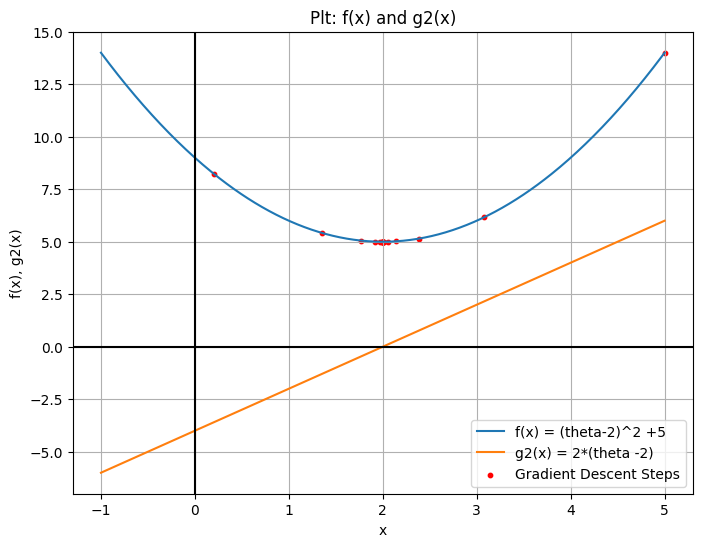

In [100]:
x = np.linspace(-1,5,400)
y_f = f(x)
y_g = g2(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y_f, label='f(x) = (theta-2)^2 +5')
plt.plot(x, y_g, label='g2(x) = 2*(theta -2)')
plt.scatter(theta_values, f_values, color='red', s=10, label='Gradient Descent Steps')
plt.title('Plt: f(x) and g2(x)')
plt.xlabel('x')
plt.ylabel('f(x), g2(x)')

ax = plt.gca()
ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 

plt.grid(True)
plt.legend()

plt.show

## 2

In [103]:
data = pd.read_csv("Lab2_Optimization.csv", delimiter=";")
data

,id,LoanAmount,TimeToFund
0,109570,575,0
1,111913,900,1
2,1457371,200,1
3,1470250,700,21
4,228017,450,3
...,...,...,...
65278,649617,250,5
65279,755176,200,11
65280,1011000,225,2
65281,1011212,500,12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


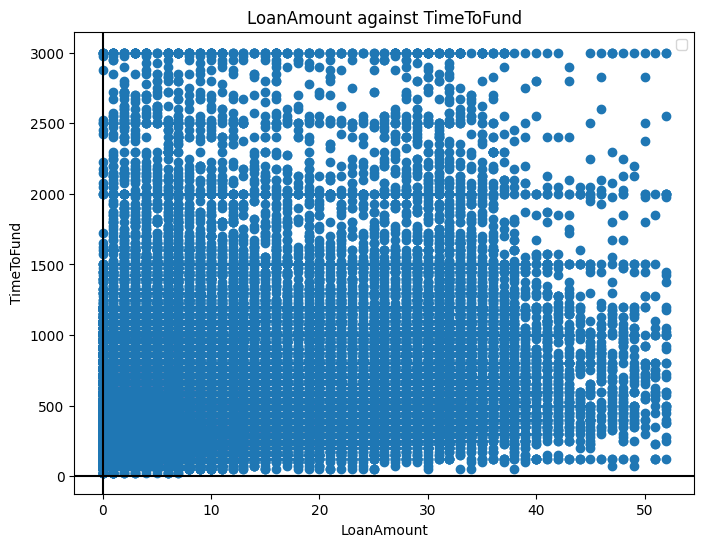

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(y=data["LoanAmount"], x=data["TimeToFund"])
plt.title("LoanAmount against TimeToFund")
plt.xlabel('LoanAmount')
plt.ylabel('TimeToFund')
plt.legend()

ax = plt.gca()
ax.axhline(0, color='black', linewidth=1.5)  
ax.axvline(0, color='black', linewidth=1.5) 
#ax.set_xlim([0, 3000])
#ax.set_ylim([0, 30])
plt.show()


In [127]:
# Functino to calculate MSE
def MSE(beta_0, beta_1, y, X):
    residuals = y - (beta_0 + beta_1 * X)
    return sum(residuals**2) / len(y)

def residuals(beta_0, beta_1, y, X):
    return y - (beta_0 + beta_1 * X)


y = data["TimeToFund"]
X = data["LoanAmount"]
beta_0 = 7
beta_1 = 0.1


f = MSE(beta_0, beta_1, y, X)
print(f)

4880.036234548044


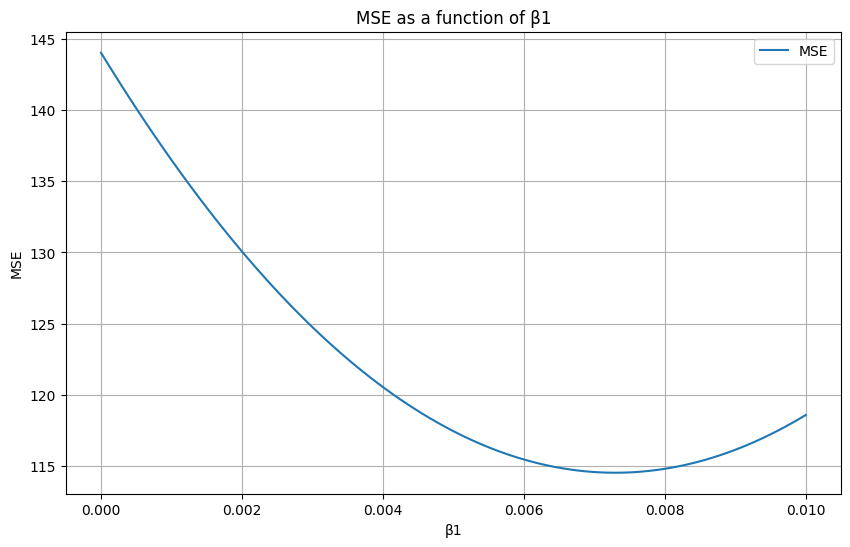

In [128]:
beta_1_values = np.linspace(0, 0.01, 100)


mse_values = [MSE(7, beta_1, y, X) for beta_1 in beta_1_values]


plt.figure(figsize=(10, 6))
plt.plot(beta_1_values, mse_values, label='MSE')
plt.title('MSE as a function of β1')
plt.xlabel('β1')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()